# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Rivaro Farrelino Gozali
- **Email:** rivfarrelino@gmail.com
- **ID Dicoding:** rivaro_farrelino

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda dalam setahun? Apakah tahun 2011 atau 2012 yang lebih dominan?
- Bagaimana pengaruh kelembaban (humidity) dan temperature (temperature dan feeling_temperature) terhadap tren peminjaman sepeda secara total?


## Import Semua Packages/Library yang Digunakan

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data
Disini saya menggunakan dataset yang pertama yaitu bike sharing, di dalam dataset ini terdapat dua file .csv, yaitu day.csv dan hour.csv yang akan kita baca menggunakan library pandas dengan function read_csv.

In [44]:
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

**Insight:**
- Dataset day.csv dan hour.csv telah dimuat ke dalam DataFrame day_df dan hour_df, masing-masing berisi informasi peminjaman harian dan per jam.

### Assessing Data

In [45]:
print("\nPreview 5 Baris Data Pertama (day.csv):")
print(day_df.head())


Preview 5 Baris Data Pertama (day.csv):
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  15

In [46]:
print("\nPreview 5 Baris Data Pertama (hour.csv):")
print(hour_df.head())


Preview 5 Baris Data Pertama (hour.csv):
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


#### Menilai struktur data dari day.csv

In [47]:
print("\nInformasi Dataset day.csv:")
day_df.info()


Informasi Dataset day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:** Setelah melihat struktur data pada day.csv, ternyata ada satu tipe data dari sebuah fitur bernama dteday yang tipe datanya object. Fitur dteday disini berfungsi sebagai informasi tanggal peminjaman yang **seharusnya bertipe data datetime, bukan object**. Maka dari itu kita ganti.

#### Mengecek apakah ada missing value dalam day.csv

In [48]:
print("\nJumlah Missing Values per Kolom:")
day_df.isnull().sum()


Jumlah Missing Values per Kolom:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:** Setelah dicek ternyata tidak ada missing value dalam day.csv, alhamdulillah.

#### Mengecek apakah ada duplikasi data dalam day.csv

In [49]:
print("\nJumlah Data Duplikat:")
day_df.duplicated().sum()


Jumlah Data Duplikat:


0

**Insight:** Setelah dicek ternyata dalam day.csv tidak ada duplikasi data (semua datanya unique), berarti aman alhamdulillah.

#### Mengecek statistik deskriptif dalam day.csv

In [50]:
print("\nStatistik Deskriptif Dataset day.csv:")
day_df.describe()


Statistik Deskriptif Dataset day.csv:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:** Setelah saya analisis, tampaknya tidak adanya keanehan yang berarti. Distribusi data dalam day.csv cenderung aman. Alhamdulillah.

#### Menilai struktur data dari data hour.csv

In [51]:
print("\nInformasi Dataset hour.csv:")
hour_df.info()


Informasi Dataset hour.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:** Terdapat satu masalah yang sama seperti pada day.csv, yaitu column dteday yang bertipe data object, seharusnya adalah datetime.

#### Mengecek apakah ada missing value dalam hour.csv

In [52]:
print("\nJumlah Missing Values per Kolom:")
hour_df.isnull().sum()


Jumlah Missing Values per Kolom:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:** Setelah dicek ternyata tidak ada missing value dalam hour.csv, alhamdulillah.

#### Mengecek apakah ada duplikasi data dalam hour.csv

In [53]:
print("\nJumlah Data Duplikat:")
hour_df.duplicated().sum()


Jumlah Data Duplikat:


0

#### Mengecek statistik deskriptif dalam hour.csv

In [54]:
print("\nStatistik Deskriptif Dataset hour.csv:")
hour_df.describe()


Statistik Deskriptif Dataset hour.csv:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
Setelah saya analisis, tampaknya tidak adanya keanehan yang berarti. Distribusi data dalam hour.csv cenderung aman. Alhamdulillah.

### Cleaning Data

#### Menghapus data yang tidak diperlukan

Dalam langkah ini, saya akan menghapus tabel hour_df (hour.csv). Alasannya adalah karena tidak relevan dengan pertanyaan bisnis saya. Terlebih perbedaan hour.csv dan day.csv adalah hanya pada kolom hr saja.

In [55]:
del hour_df

#### Menghapus kolom-kolom yang tidak penting/tidak relevan

Untuk langkah ini, saya akan menghapus columns yang saya tidak relevan untuk pertanyaan bisnis.
1. instant: hanya ID baris, tidak relevan
2. holiday: Indikator hari libur, tidak relevan karena pertanyaan bisnis tidak membahas pengaruh hari libur terhadap peminjaman.
3. weekday: Menunjukkan hari dalam seminggu, tidak diperlukan karena kita lebih fokus pada tren tahunan dan pengaruh suhu serta kelembaban.
4. workingday: Indikator apakah hari tersebut adalah hari kerja, tidak relevan karena analisis tidak membedakan antara hari kerja dan non-kerja.
5. windspeed: Kecepatan angin dalam skala normalisasi, tidak diperlukan karena kita hanya menganalisis pengaruh suhu dan kelembaban terhadap peminjaman sepeda.
6. weathersit: Kondisi cuaca secara keseluruhan, bisa dihapus jika kita hanya fokus pada suhu (temp dan atemp) serta kelembaban (hum).
7. casual: jumlah pengguna yang bisa kita lihat secara total melalui koloom **cnt**
8. registered: jumlah pengguna yang bisa kita lihat secara total melalui koloom **cnt**

In [56]:
drop_col = ['instant', 'season', 'holiday', 'weekday', 'workingday', 'windspeed', 'weathersit', 'casual', 'registered']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,yr,mnth,temp,atemp,hum,cnt
0,2011-01-01,0,1,0.344167,0.363625,0.805833,985
1,2011-01-02,0,1,0.363478,0.353739,0.696087,801
2,2011-01-03,0,1,0.196364,0.189405,0.437273,1349
3,2011-01-04,0,1,0.200000,0.212122,0.590435,1562
4,2011-01-05,0,1,0.226957,0.229270,0.436957,1600


#### Mengubah nama variabel

Karena menurut saya fitur  yang ada tidak terlalu bisa di interpretabilitaskan oleh saya pribadi, maka dari itu beberapa nama fitur akan saya ubah. **Ini bersifat subjektif**

In [57]:
# Mengubah nama judul kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'temp': 'temperature',
    'atemp': 'feeling_temperature',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)

day_df

,dateday,year,month,temperature,feeling_temperature,humidity,count
0,2011-01-01,0,1,0.344167,0.363625,0.805833,985
1,2011-01-02,0,1,0.363478,0.353739,0.696087,801
2,2011-01-03,0,1,0.196364,0.189405,0.437273,1349
3,2011-01-04,0,1,0.200000,0.212122,0.590435,1562
4,2011-01-05,0,1,0.226957,0.229270,0.436957,1600
...,...,...,...,...,...,...,...
726,2012-12-27,1,12,0.254167,0.226642,0.652917,2114
727,2012-12-28,1,12,0.253333,0.255046,0.590000,3095
728,2012-12-29,1,12,0.253333,0.242400,0.752917,1341
729,2012-12-30,1,12,0.255833,0.231700,0.483333,1796


#### Mengubah angka menjadi keterangan

In [58]:
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

day_df

,dateday,year,month,temperature,feeling_temperature,humidity,count
0,2011-01-01,0,Jan,0.344167,0.363625,0.805833,985
1,2011-01-02,0,Jan,0.363478,0.353739,0.696087,801
2,2011-01-03,0,Jan,0.196364,0.189405,0.437273,1349
3,2011-01-04,0,Jan,0.200000,0.212122,0.590435,1562
4,2011-01-05,0,Jan,0.226957,0.229270,0.436957,1600
...,...,...,...,...,...,...,...
726,2012-12-27,1,Dec,0.254167,0.226642,0.652917,2114
727,2012-12-28,1,Dec,0.253333,0.255046,0.590000,3095
728,2012-12-29,1,Dec,0.253333,0.242400,0.752917,1341
729,2012-12-30,1,Dec,0.255833,0.231700,0.483333,1796


#### Mengubah tipe data

In [59]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubah tipe data ke kategorikal
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')

day_df.head()

,dateday,year,month,temperature,feeling_temperature,humidity,count
0,2011-01-01,0,Jan,0.344167,0.363625,0.805833,985
1,2011-01-02,0,Jan,0.363478,0.353739,0.696087,801
2,2011-01-03,0,Jan,0.196364,0.189405,0.437273,1349
3,2011-01-04,0,Jan,0.200000,0.212122,0.590435,1562
4,2011-01-05,0,Jan,0.226957,0.229270,0.436957,1600


In [61]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateday              731 non-null    datetime64[ns]
 1   year                 731 non-null    category      
 2   month                731 non-null    category      
 3   temperature          731 non-null    float64       
 4   feeling_temperature  731 non-null    float64       
 5   humidity             731 non-null    float64       
 6   count                731 non-null    int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(1)
memory usage: 30.6 KB


## Exploratory Data Analysis (EDA)

### Explore Data day.csv

#### agregasi data jumlah berdasarkan month/bulan

In [70]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
}).sort_values(by=('count', 'mean'), ascending=False)

<ipython-input-70-9531ddc686fd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Jun    8120  3767  5772.366667  346342
Sep    8714  1842  5766.516667  345991
Aug    7865  1115  5664.419355  351194
Jul    8173  3285  5563.677419  344948
May    8294  2633  5349.774194  331686
Oct    8156    22  5199.225806  322352
Apr    7460   795  4484.900000  269094
Nov    6852  1495  4247.183333  254831
Mar    8362   605  3692.258065  228920
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933

**Insight:** dari hasil agregasi data diatas, dapat dilihat bahwa rata-rata tertinggi terdapat pada bulan juni, dan terendah berada pada januari

#### agregasi data jumlah berdasarkan tahun/year

In [75]:
day_df.groupby(by='year').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-75-6e9141151fa7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='year').agg({


count                           
       max  min         mean      sum
year                                 
0     6043  431  3405.761644  1243103
1     8714   22  5599.934426  2049576

**Insight:**
dari hasil agregasi data diats, dapat dilihat bahwa jumlah penyewa sepeda terbanyak ada pada tahun 2012

#### agregasi data temperature, feeling_temperature, dan humidity berdasarkan bulan/month

In [87]:
df_grouped = day_df.groupby(by='month').agg({
    'temperature': ['max', 'min', 'mean'],
    'feeling_temperature': ['max', 'min', 'mean'],
    'humidity': ['max', 'min', 'mean'],
    'count': 'sum'  # Total peminjaman sepeda per bulan
}).reset_index()

# Urutkan berdasarkan total peminjaman sepeda (count sum)
df_grouped = df_grouped.sort_values(by=('count', 'sum'), ascending=False)

# Tampilkan hasil
df_grouped

<ipython-input-87-e3dcf89a60e1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = day_df.groupby(by='month').agg({


month temperature                     feeling_temperature            \
                 max       min      mean                 max       min   
1    Aug    0.793333  0.635833  0.708582            0.751267  0.242400   
6    Jun    0.834167  0.540833  0.684097            0.786613  0.525892   
11   Sep    0.753333  0.469167  0.616485            0.708983  0.461475   
5    Jul    0.861667  0.595833  0.755470            0.840896  0.549912   
8    May    0.775000  0.414167  0.594798            0.725383  0.404650   
10   Oct    0.657500  0.254167  0.485012            0.607975  0.227913   
0    Apr    0.664167  0.300000  0.469999            0.614925  0.283454   
9    Nov    0.530000  0.245833  0.369220            0.524612  0.248742   
7    Mar    0.601667  0.198333  0.390539            0.570067  0.200133   
2    Dec    0.475833  0.215833  0.324031            0.469054  0.220333   
3    Feb    0.521667  0.127500  0.299226            0.511983  0.101658   
4    Jan    0.425000  0.059130  0.236444            0.415383  0.079070   

              humidity                       count  
        mean       max       min      mean     sum  
1   0.651475  0.850000  0.415000  0.637730  351194  
6   0.638246  0.833333  0.305000  0.575806  346342  
11  0.579299  0.972500  0.467083  0.714714  345991  
5   0.704094  0.865417  0.396250  0.597876  344948  
8   0.565662  0.922500  0.360417  0.688958  331686  
10  0.471973  0.906250  0.463333  0.693761  322352  
0   0.457081  0.888333  0.254167  0.588063  269094  
9   0.367359  0.962500  0.333478  0.624876  254831  
7   0.381954  0.948261  0.000000  0.588475  228920  
2   0.326160  0.970417  0.441250  0.666041  211036  
3   0.299731  0.929167  0.187917  0.567465  151352  
4   0.239796  0.911250  0.311250  0.585828  134933

**Insight:** Berdasarkan agregasi data diatas didapatkan
1. Rata-rata peminjaman sepeda dua tertinggi terjadi pada bulan Agustus dan Juni. Pada bulan Agustus dan Juni didapati bahwa suhunya sedang hangat dan kelembapan yang sedang.
2. Suhu tinggi mendukung tren peminjaman, tetapi jika terlalu panas mungkin berkurang.
3. Kelembaban tinggi mungkin menurunkan peminjaman.

#### Mencari hubungan antar fitur dengan heatmap

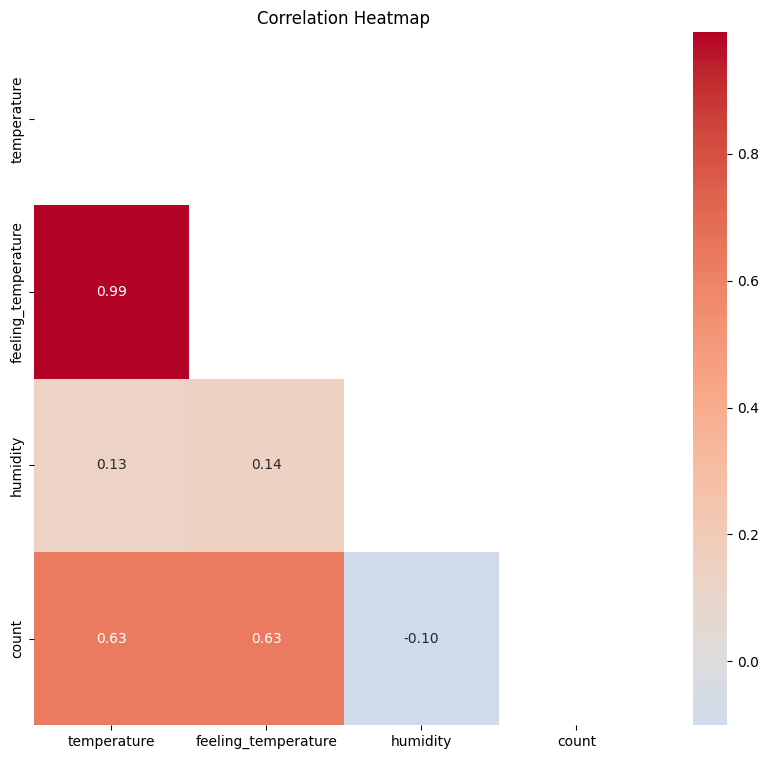

In [91]:
fig, ax = plt.subplots(figsize=(10,9))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Insight:**
Dari hasil analisis diatas terdapat beberapa point penting
- temperature dan feeling_temperature sangat berkorelasi (0.99)
- humidity punya korelasi cenderung positif lemah dengan temperature dan feeling_temperature (0.13 dan 0.14)
- count punya korelasi kuat positif dengan temperature dan feeling_temperature (0.63 dan 0.63) tetapi punya korelasi negatif lemah dengan humidity (-0.10)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda dalam setahun? Apakah tahun 2011 atau 2012 yang lebih dominan?

<ipython-input-92-e3e9bae5d24b>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["month","year"]).agg({


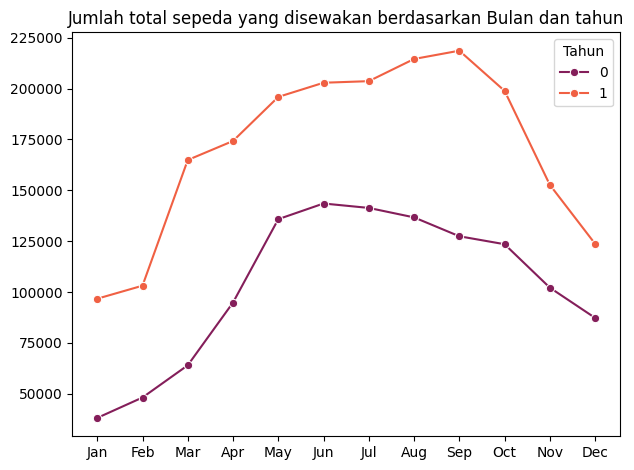

In [92]:
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
    marker="o")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

**Insight:**
- berdasarkan hasil analisis dapat dilihat bahwa pada tahun 2012 jumlah total sepeda yang disewakan lebih unggul daripada 2011, baik dari segi tiap bulan maupun total tahunan.
- Pada tahun 2011 puncak tertinggi penyewaan sepeda terjadi pada bulan Juni dan terendah pada bulan Januari.
- Pada tahun 2012 puncak tertinggi penyewaan sepeda terjadi pada bulan September dan terendah pada bulan Januari.

### Pertanyaan 2: Bagaimana pengaruh kelembaban (humidity) dan temperature (temperature dan feeling_temperature) terhadap tren peminjaman sepeda secara total?

Text(0.5, 1.0, 'Humidity vs Count')

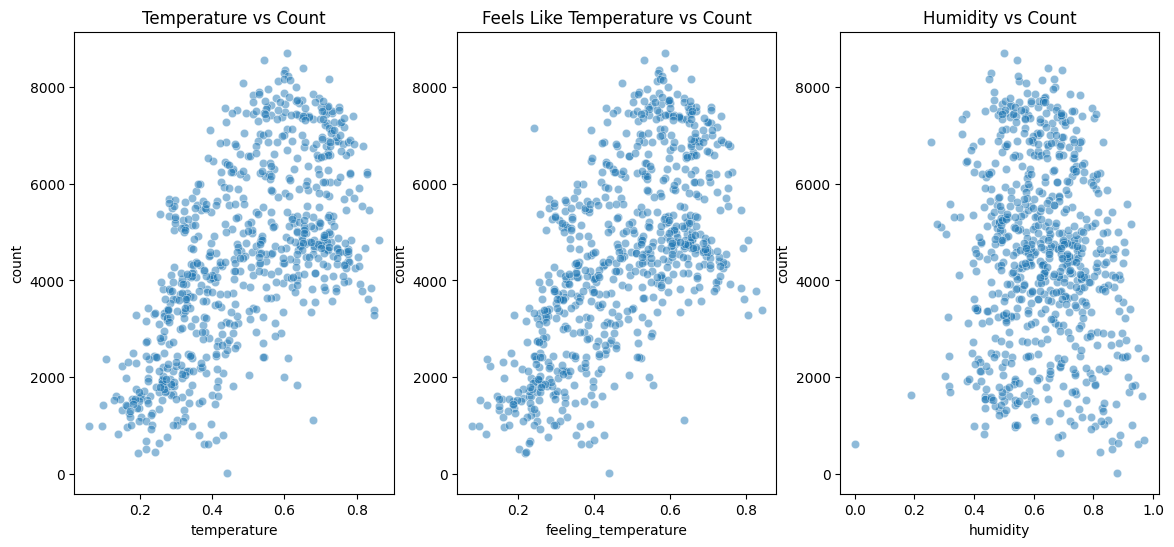

In [94]:
plt.figure(figsize=(14, 6))

# Scatter plot untuk 'temperature' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='temperature',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Temperature vs Count')

# Scatter plot untuk 'feeling_temperature' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='feeling_temperature',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Feels Like Temperature vs Count')

# Scatter plot untuk 'humidity' vs 'count'
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='humidity',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Humidity vs Count')

**Insight:**
Berdasarkan analisis data diatas menggunakan scatter plot terdapat:
- Hubungan antara temperature dan count terlihat pola positif linear, yang berarti semakin tinggi temperatur, semakin banyak sepeda yang disewa. Kemudian pada temperatur rendah, jumlah penyewaan sepeda cenderung lebih sedikit.
- Hubungan antara feeling_temperature dan count nirip dengan grafik pertama, hubungan antara temperatur yang dirasakan (feeling_temperature) dan jumlah penyewaan sepeda juga menunjukkan tren positif linear.
- Hubungan antara humidity dan count tidak terlihat pola yang begitu jelas, menunjukkan bahwa kelembaban bukan faktor utama dalam menentukan tren penyewaan sepeda, berbeda dengan temperatur.

## Analisis Lanjutan (Opsional)

## Conclusion

### **Kesimpulan dan Rekomendasi**  

#### **Conclusion Pertanyaan 1:**  
Berdasarkan analisis datasets bike sharing, ditemukan bahwa tren peminjaman sepeda pada tahun 2011 dan 2012 menunjukkan adanya perbedaan pola musiman. Pada tahun **2011**, jumlah penyewaan tertinggi terjadi pada bulan **Juni**, dengan jumlah peminjaman mencpai sekitar **6.043 unit sepeda**. Sementara itu, jumlah peminjaman terendah terjadi pada bulan **Januari**

Di sisi lain, pada tahun **2012**, puncak peminjaman bergeser ke bulan **September**, dengan jumlah penyewaan sepeda mencapai **8.714 unit**. Namun, titik terendah tetap berada di bulan **Januari**, dgn jumlah penyewaan yang mirip dgn tahun sebelumnya. Selain itu, total peminjaman sepeda secara keseluruhan pada tahun **2012 lebih tinggi dibandingkan dgn tahun 2011**. Hal ini menunjukkan adanya peningkatan minat masyarakat dalam menggunakan layanan penyewaan sepeda, yang mungkin disebabkan oleh faktor eksternal seperti peningkatan fasilitas infrastruktur, promosi layanan, atau perubahan kebiasaan pengguna.  

**Rekomendasi:**  
1. **Meningkatkan Stok Sepeda pada Musim Ramai**  
   - Karena puncak penyewaan terjadi di bulan Juni (2011) dan September (2012), penyedia layanan sebaiknya meningkatkan ketersediaan sepeda pada bulan-bulan ini untuk mengantisipasi lonjakan permintaan.  
2. **Menyediakan Promosi atau Insentif di Bulan Januari**  
   - Mengingat bulan Januari memiliki jumlah peminjaman yang paling rendah, strategi promosi seperti diskon atau layanan tambahan dapat diterapkan untuk meningkatkan minat pengguna selama musim dingin.  

---

#### **Conclusion Pertanyaan 2:**  
Hasil analisis menunjukkan bahwa **humidity (kelembaban udara) memiliki korelasi negatif dgn jumlah penyewaan sepeda**. Artinya, semakin tinggi tingkat kelembaban, semakin sedikit jumlah peminjaman sepeda. Namun, korelasi ini relatif kecil sehingga dampaknya tidak terlalu signifikan. Sebagai contoh, pada kelembaban tinggi di atas 80%, rata-rata jumlah peminjaman sepeda berada di kisaran 3.500 - 4.500 unit per hari.
Sebaliknya, saat kelembaban berada di sekitar 40-50%, rata-rata peminjaman meningkat hingga lebih dari 5.500 unit per hari.  

Di sisi lainnya, **temperature dan feeling_temperature memiliki korelasi positif terhadap jumlah peminjaman sepeda**. Ketika suhu meningkat, jumlah pengguna juga meningkat.

**Rekomendasi:**  
1. **Memprioritaskan Perawatan Sepeda pada Musim Lembab**  
   - Karena kelembaban tinggi sedikit menurunkan jumlah peminjaman, penyedia layanan dapat mengantisipasi dengan merawat sepeda agar tetap dalam kondisi optimal dan memberikan informasi kepada pengguna terkait kenyamanan berkendara saat kelembaban tinggi.  
2. **Memanfaatkan Suhu Hangat untuk Kampanye Peningkatan Penggunaan Sepeda**  
   - Mengingat suhu yang lebih tinggi berkorelasi dengan meningkatnya jumlah peminjaman, kampanye atau promosi dapat difokuskan pada musim dengan suhu lebih tinggi untuk mendorong lebih banyak pengguna menggunakan layanan sepeda.  